# CSCI 3202, Spring 2018

# Wednesday 14 - Friday 16 February 2018

# In-class notebook:  Hill-Climbing and Simulated Annealing

<a id='top'></a>

<br>

### Your name(s): Anthony Tracy and Cody

<br>

* When you submit this to Moodle (under Quizlet 5), be sure to include all of your group members' names.
* You may work in groups of up to 3 people,
* but **all people** in the group must submit the assignment on their own Moodle account (because Moodle is a pain in the ass to create groups and this will still be faster than your normal quizlets).

---

Shortcuts:  [Top](#top) || [1](#p1) | [1a](#p1a) | [1b](#p1b) | [1c](#p1c) | [1d](#p1d) | [1e](#p1e) || [2](#p2) | [2a](#p2a) | [2b](#p2b) | [2c](#p2c) | [2d](#p2d) || [Bottom](#bottom)

---

Before we begin, let's load a few packages that we might find useful.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

<br>

<img src="http://1.bp.blogspot.com/-mWUxSF7q_JY/Vbd84OcwaSI/AAAAAAAA7No/5iT8gMZBHw8/s1600/seilschaft2---helliventures-joachimhellinger.jpg=" width="300"/>

<a/ id='p1'></a>

## Problem 1: Hill-climbing

The over-arching goal here is to maximize some objective function.  You can also look at this as minimizing some kind of a loss... and you will!

In many applications, the objective function might turn out to be a Gaussian function, such as this one:

In [2]:
def gaussian_objective(state):
    return stats.norm.pdf(x=state, loc=5, scale=2)

Note the this objective function is just taking in some value $\texttt{state}$ and returning the value of the normal probability density function, centered at $\texttt{loc} = \mu = 5$ and with standard deviation $\texttt{scale} = \sigma = 2$:
$$f(\texttt{state}) = \dfrac{1}{\sqrt{2\pi}\sigma} e^{-\dfrac{(\texttt{state}-\mu)^2}{2\sigma^2}}$$

For good measure, let's plot this thing up and see what it looks like.

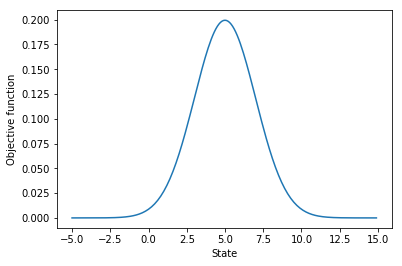

In [3]:
x = np.arange(-5,15,0.1)
f = [gaussian_objective(state) for state in x]

plt.plot(x,f)
plt.xlabel('State')
plt.ylabel('Objective function')
plt.show()

Neat.

<br>

The first order of business if we want to maximize some objective function using the **local search** techniques we just learned will be to set up a class structure to make this easier.

If we do this in a general enough way for **hill-climbing** (this first part), we will only need to modify a few things to tackle a trickier problem using **simulated annealing**.

<a/ id='p1a'></a>

### (1a)  A class structure to solve problems

So first, let's define a class to keep track of the `state`.  This is the quantity we want to adjust in order to optimize the objective function.  That sentence indicates the two values we really need to keep track of for a `state`:
1. the value of `state`
2. the value of the `objective_function` when evaluated at `state`

In [113]:
class state:
    # we need to be able to keep track of states and their associated
    def __init__(self,node,value):
        self.node = node
        self.value = value
    # objective function values

tmp = state(1,2)

Now we need to define our problem.  This should be entirely self-contained, so that we need to feed the `hill_climb` optimization routine below a fairly generic problem description, and it can solve it, so we can easily feed in different problems.

**The goal** with this class structure is to have everything that is **problem-specific** sent into the hill-climbing optimization/local search be self-contained within the `problem` object.

We can also write a general problem class, which we might then ***sub-class*** for our specific needs for hill-climbing or simulated annealing.

In [131]:
class problem:

    # We want to include everything that defines the problem here:
    def __init__(self,initial,objective_function,stepsize):
        # - initial state - Since initial comes in as a state and state.node is initial, while state.value is current
        self.node = initial.node
        # - current state
        self.value = initial.value
        # - what is the objective function we're trying to maximize/minimize?
        self.objective_function = objective_function
        # - what are the choices of action that we have? - Well we either go up or down by a step size of stepsize:
        self.step = stepsize
        
        # - what do we need to know to select our action? - We need to minimize/maximize our objective
    def step_forward(self):
        return state(node=self.node+self.step,value=self.objective_function(self.node+self.step))
        #return min(forward,backward) if(minimum) else min(forward,backward)
    def step_backward(self):    
        return state(node=self.node-self.step,value=self.objective_function(self.node-self.step))
        # So here I am aiming to return a state object depending on if I am minimizing or maximizing the function:
                
tmp = problem(initial=initial_state, objective_function=gaussian_objective, stepsize=0.1)


Finally, we can turn our Hill-climbing pseudocode into real code, that takes only two arguments and returns the `state` that optimizes the `objective_function`.  Note that the return can be done implicitly by manipulating the current state within our `problem`, or we could code it up as an explicit output.

In [148]:
def hill_climb(prob, n_iter):
    
    for t in range(n_iter):
        #1. get a list of our available moves
        # I can go forward, backward, or stay:
        cElev = prob                       # Stay
        fElev = prob.step_forward()        # forward
        bElev = prob.step_backward()       # Backward
                
        #2. which move optimizes the objective function?
        # Should include the stay for a threshold value at some point:
        next_state = fElev if fElev.value > bElev.value else bElev
        
        #3. do that move; update our state
        # Note that in this point I could make the step size vary if needed...
        prob = problem(initial=next_state, objective_function=prob.objective_function, stepsize=prob.step)
        
        #4. possible goal/convergence check
        # Have yet to impliment this due to time, but if I were to :
        # I would likely use a threshold value for the y so that if the increase in eleveation is bellow some
        # reeeealllly small value, like 1e-8 or smaller then stop and return
        # Or the second idea I have could be to do something similar but looking at the rate of change of the slope from 
        # step to step. If that rate of change gets much smaller than a relativly constant value then I should 
        # be able to find where it converged.
    
    return prob
    
    
#class problem_hillclimb(problem):
#    
#    # let's subclass this like it's hot
#    # So we know we want to climb the hill, cool:
#   # This means we want to maximize the cost since we want to go up:
#    def __init__(self,problem):
#        # Names / functions:
#        self.name = "Hill Climbing"
#        self.problem = problem
#        #self.objective_function = problem.objective_function
#        #self.minimize = False # In the sense that I want to maximize
#        # Locations: - just rewriteing these in order to better relate the problem the the hill_problem:
#        #self.elevation = problem.y
#        #self.x = problem.x
#        #self.dx = problem.step
#        #self.next_step = problem.optimize(self.minimize)
        
    

<a/ id='p1b'></a>

### (1b)  Ready to solve!

Let's start by creating an `initial_state` for our problem.  Here, we are beginning at `state` = 1.

In [149]:
initial_state = state(node=1, value=gaussian_objective(1))


Now we need an instance of our `problem`.

In [156]:
gaussian_problem  = problem(initial=initial_state, objective_function=gaussian_objective, stepsize=0.1)
#gaussian_problem = problem_hillclimb(problem1)

gaussian_problem.value

0.026995483256594031

Finally, we can turn out `hill_climb` algorithm loose on this problem.

In [157]:
out = hill_climb(gaussian_problem, n_iter=100)

print(out.node, out.value)

4.999999999999999 0.199471140201


## A couple extensions

That's good and all, but that particular objective function was just a single univariate Gaussian.  It turns out that the real world is tougher than that.  So let's tackle some tougher problems, shall we?

<a/ id='p1c'></a>

### (1c) Minimization

First, it might be the case that we want to ***minimize*** an objective function instead of maximizing it.  Modify your hill-climbing codes to tackle the problem of minimization.  Note:  this ought to be do-able by modifying a single line of code from above...

In [164]:
# Copying my code above and making it minimize:
def hill_descent(prob, n_iter):
    
    for t in range(n_iter):
        #1. get a list of our available moves
        # I can go forward, backward, or stay:
        cElev = prob                       # Stay
        fElev = prob.step_forward()        # forward
        bElev = prob.step_backward()       # Backward
                
        #2. which move optimizes the objective function?
        # Should include the stay for a threshold value at some point:
 
        # # # THis is that 1 line:
        next_state = fElev if fElev.value < bElev.value else bElev
        
        #3. do that move; update our state
        # Note that in this point I could make the step size vary if needed...
        prob = problem(initial=next_state, objective_function=prob.objective_function, stepsize=prob.step)
        
        #4. possible goal/convergence check
        # Have yet to impliment this due to time, but if I were to :
        # I would likely use a threshold value for the y so that if the increase in eleveation is bellow some
        # reeeealllly small value, like 1e-8 or smaller then stop and return
        # Or the second idea I have could be to do something similar but looking at the rate of change of the slope from 
        # step to step. If that rate of change gets much smaller than a relativly constant value then I should 
        # be able to find where it converged.
    
    return prob



Now **define your own** objective function to minimize!  Easy options include concave-up quadratic functions just slapping a $-$ sign into the Gaussian objective function defined above.  Then turn your descent algorithm loose on the minimization problem.

In [165]:
def neg_gaussian_objective(state):
    return -1*stats.norm.pdf(x=state, loc=5, scale=2)

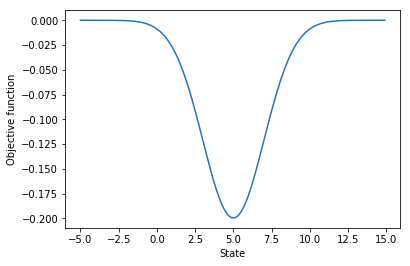

In [166]:
# Visual:

x = np.arange(-5,15,0.1)
f = [neg_gaussian_objective(state) for state in x]

plt.plot(x,f)
plt.xlabel('State')
plt.ylabel('Objective function')
plt.show()

In [168]:
initial_state = state(node=1, value=neg_gaussian_objective(1))
gaussian_problem  = problem(initial=initial_state, objective_function=neg_gaussian_objective, stepsize=0.1)
out = hill_descent(gaussian_problem, n_iter=50)

print(out.node, out.value)

4.999999999999999 -0.199471140201


<a/ id='p1d'></a>

### (1d)  Random restarts

That single Gaussian actually covers many real-world applications of optimization and local search, but many other applications lead to "bumpier" objective functions.  Suppose you are trying to fit a model to noisy data, and suppose each of your data points has normally-distributed uncertainty.  Then the objective function you would like to minimize could take the form of the sum of several Gaussian distributions, like so:

$$f(\texttt{state}) = \dfrac{1}{\sqrt{2\pi}\sigma} \left(e^{-\dfrac{(\texttt{state}-\mu_0)^2}{2\sigma^2}} + 
e^{-\dfrac{(\texttt{state}-\mu_1)^2}{2\sigma^2}} + 
e^{-\dfrac{(\texttt{state}-\mu_2)^2}{2\sigma^2}} + 
e^{-\dfrac{(\texttt{state}-\mu_3)^2}{2\sigma^2}} + 
e^{-\dfrac{(\texttt{state}-\mu_4)^2}{2\sigma^2}}\right)$$

Here, $\mu_i$ denotes the data points you have, $\sigma$ is assumed to be an uncertainty shared by all of them, and $\texttt{state}$ is your model's output, which you want to fit through those data points.

If we let $\sigma=1$, $\mu_0 = 0$, $\mu_1 = 2.1$, $\mu_2 = 4$, $\mu_3 = 4$ and $\mu_4 = 8$, then we end up with the following objective function, `several_gaussian_objective(state)`:

In [169]:
def several_gaussian_objective(state):
    locs = [0,2.1,4,4,8] # centers of a bunch of normal distributions
    objective_value = 0
    # objective function is actually just the sum of a bunch of normal pdfs
    for loc in locs:
        objective_value += stats.norm.pdf(state, loc=loc, scale=1)
    return objective_value

Plot up this new objective function as a function of `state`.  What do you notice?  Will our "vanilla" hill-climbing routine successfully climb the hill and maximize this objective function for *any* initial state?

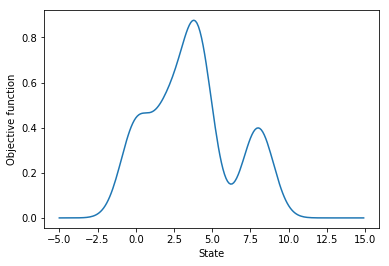

In [171]:
x = np.arange(-5,15,0.1)
f = [several_gaussian_objective(state) for state in x]

plt.plot(x,f)
plt.xlabel('State')
plt.ylabel('Objective function')
plt.show()


Looking at this graph, our hill climber could find the max IF and only if given a good starting condition. Otherwise it is likely that it would get stuck.

We can check about where the global maximum is fairly easily:



In [172]:
max(zip(fx, x))

NameError: name 'fx' is not defined

Let's modify our vanilla hill-climbing solution approach from **(1b)** to include 500 random restarts for the initial state.

The following code snippet will draw `n_restarts` random samples from the range $[0, 1)$.

In [ ]:
sample = np.random.random(size=n_restarts)

Modify that to draw instead from the range $[-2, 10)$.  Use those samples to create an **ensemble** of the values of `state` for which the objective function is maximized.  Plot a histogram of them, and make a conclusion about what the "best guess" for the maximal `state` is.

<br>

---

<br>

<img src="https://www.metalsupermarkets.com/wp-content/uploads/2015/09/Heat-Treating-Furnace-2.jpg" width="300"/>

<a/ id='p2'></a>

## Problem 2: Simulated annealing

<a/ id='p2a'></a>

### (2a) 

First, we need to either create a new class for a simulated annealing `problem`, or sub-class our `problem` class from earlier. That shouldn't be too bad - the main difference is that instead of the best move at any given point, we need to select a random one.

In addition to the `objective_function` argument during construction, we also ought to include the `schedule_function` for the temperature updates as time goes on (which moderate how likely we are to take sub-optimal steps). (We will define that one next!)

In [ ]:
class problem_anneal(problem):

    # it's subclassing time!
    

<a/ id='p2b'></a>

### (2b)  Find a temperature schedule

Now, we need to actually write our code for the simulated annealing algorithm.  That's a bit more involved than the hill-climbing.

The trickiest part is deciding the form for (1) the temperature/time schedule $T(t)$ ($T$ is temperature, $t$ is time), and (2) the accept/reject probability as a function of temperature and the difference in model performance between our current and proposed moves, $\Delta E$.

First, let's play around with the **temperature schedule**.  A typical choice might look like:

$$T(t) = \dfrac{C}{(t+1)^p}$$

where $C$ and $p$ are some constants you can tune. The +1 in the denominator is to avoid divide-by-0 situations. 

Now a typical choice for the probability of accepting a move, based on $\Delta E = f(\text{current state}) - f(\text{proposed state})$ (where $f$ is the objective function that we want to *minimize* here) is:

$$p_{accept} = \exp{\left(\dfrac{\Delta E}{T(t)}\right)}$$

Note that:
1. if we wanted instead to *maximize* $f$, we just need to throw a $-$ sign in front of $\Delta E$, and
2. if we find that $f(\text{proposed state}) < f(\text{current state})$, then $\Delta E > 0$ and we should accept the move with $p_{accept} = 1$.

That form for $p_{accept}$ is based loosely off of Newton's Law of Cooling and good old-fashioned thermodynamics.  Say what you will about Newton ([he was a jerk](https://jencyclopedic.wordpress.com/2014/04/02/isaac-newton-was-a-dick/)), but his law of cooling is pretty nice.

See if you can choose $C$ and $p$ such that the acceptance probability $p_{accept}$ starts near 1 and decreases smoothly to somewhere between 0 and 20% for $t$ ranging from 0 to 1,000.
For these preliminary tests, let's just assume that $\Delta E$ is constant at $\Delta E = -0.2$.

Armed with these choices for $C$ and $p$, we can define a `schedule(time)` function for $T(t)$:

In [ ]:
def schedule(time):
    '''some sort of mapping from time to temperature, to represent how we should be 
    "cooling off" - that is, accepting wacky solutions with lower and lower probability'''

    C = #
    p = #
    temperature = C/(time+1)**p
    
    return temperature

<a/ id='p2c'></a>

### (2c)  Define our simulated annealing algorithm

Now that we have a temperature updating `schedule`, which defines how we accept/reject proposed moves for our simulated annealing algorithm, we can actually turn our pseudocode into real code!

Let's write a `simulated_annealing` algorithm. Similar to the `hill_climbing` one above, we should take as arguments only the `problem` statement and maybe one other argument for the number of iterations to run the algorithm.

In [ ]:
def simulated_annealing(problem, some number of iterations):
        
    for t in some number of iterations:
        #1. update the "temperature", T(t) = schedule(time)
        #2. which moves can we make from the current node?
        #3. pick a random move
        #4. calculate difference in objective function between
        #   proposed new state and the current state (deltaE)
        #5. if proposed new state is better than the current state,
        #   then accept the proposed move with probability 1
        #6. otherwise...
        #        ACCEPT the move with probability exp(-deltaE/T(t)),
        #     or REJECT with prob 1-exp(-deltaE/T(t))


<a/ id='p2d'></a>

### (2d) Let's solve that problem from class!

It's time for Tony to reveal a deep, dark secret...

You know that plot in class of an example objective function we wanted to use simulated annealing to minimize?

Well...  it's just the `several_gaussian_objective` from **(1d)** but ***upside-down!!!***

(You should feel free to rename this function...)

In [ ]:
def not_such_a_mystery_anymore_objective(state):
    locs = [0,2.1,4,4,8] # centers of a bunch of normal distributions
    objective_value = 0
    # objective function is actually just the sum of a bunch of normal pdfs
    for loc in locs:
        objective_value += stats.norm.pdf(state, loc=loc, scale=1)
    return 1-objective_value

x = np.arange(start=-5, stop=15, step=0.1)
fx = [not_such_a_mystery_anymore_objective(xk) for xk in x]

plt.plot(x, fx, c='coral', lw=2)
plt.show()

Now we're ready to use our simulated annealing algorithm to solve this problem!
1. Define an `initial_state` and declare a relevant `problem`
2. Feed these into your simulated annealing algorithm to attempt to find the global minimum

If you're having trouble hitting the global minimum, try playing around with different values for:
* stepsize (taking tiny steps makes it harder to get out of a local minimum)
* schedule (mapping from time to temperature - if you lower the temperature slowly enough, the algorithm *will* find the global minimum with probability approaching 1)
* start with initial `state` that you know should lead into the 
* try using a **random restart** range of initial states, similarly to how we tackled this problem (upside-down) using hill-climbing, and plotting a histogram of the ensemble results

[Back to top](#top)
<a/ id='bottom'></a>